In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


Importacion de librerias necesarias para el desarrollo del proyeccto.

In [2]:
Df_fraudes_crudo = pd.read_csv('CLAIMS0.csv')
Df_fraudes_crudo.head(5)

,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,FAULT,...,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGECLAIM,NUMBEROFCARS,BASEPOLICY,FRAUDFOUND
0,1,Friday,Honda,Rural,Friday,Dec,3,Male,Single,PolicyHolder,...,new,16to17,No,No,External,none,nochange,1vehicle,AllPerils,Yes
1,2,Friday,Honda,Urban,Friday,Jun,4,Male,Single,PolicyHolder,...,new,16to17,No,No,External,none,nochange,1vehicle,AllPerils,No
2,5,Monday,Honda,Urban,Friday,Apr,1,Male,Single,ThirdParty,...,new,16to17,No,No,External,none,4to8years,2vehicles,Collision,Yes
3,4,Sunday,Honda,Urban,Friday,Sep,1,Male,Single,PolicyHolder,...,new,16to17,No,No,External,none,nochange,1vehicle,Collision,Yes
4,2,Tuesday,Honda,Urban,Friday,Jan,4,Male,Single,PolicyHolder,...,new,16to17,No,No,External,none,nochange,1vehicle,AllPerils,Yes


Traemos a la notebook la base de datos sobre la que se realizara el modelo.

In [3]:
Df_fraudes_crudo.index
Df_fraudes_crudo.head(5)

,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,FAULT,...,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGECLAIM,NUMBEROFCARS,BASEPOLICY,FRAUDFOUND
0,1,Friday,Honda,Rural,Friday,Dec,3,Male,Single,PolicyHolder,...,new,16to17,No,No,External,none,nochange,1vehicle,AllPerils,Yes
1,2,Friday,Honda,Urban,Friday,Jun,4,Male,Single,PolicyHolder,...,new,16to17,No,No,External,none,nochange,1vehicle,AllPerils,No
2,5,Monday,Honda,Urban,Friday,Apr,1,Male,Single,ThirdParty,...,new,16to17,No,No,External,none,4to8years,2vehicles,Collision,Yes
3,4,Sunday,Honda,Urban,Friday,Sep,1,Male,Single,PolicyHolder,...,new,16to17,No,No,External,none,nochange,1vehicle,Collision,Yes
4,2,Tuesday,Honda,Urban,Friday,Jan,4,Male,Single,PolicyHolder,...,new,16to17,No,No,External,none,nochange,1vehicle,AllPerils,Yes


Agregamos un indice para mejorar la manejabilidad de los datos.

Preparcion, limpieza y procesamiento de datos. (objetivo: aumentar la manejabilidad y facilidad de comprension de los datos)

In [4]:
Df_fraudes_crudo['VEHICLEPRICE'].unique()

array(['more than 69_000', '20_000 to 29_000', 'less than 20_000',
       '30_000 to 39_000', '40_000 to 59_000', '60_000 to 69_000'],
      dtype=object)

In [5]:
Df_fraudes_crudo['VEHICLEPRICE'] = Df_fraudes_crudo['VEHICLEPRICE'].replace({
    'more than 69_000':'very_high',
    '60_000 to 69_000':'high',
    '40_000 to 59_000':'medium_high',
    '30_000 to 39_000':'medium',
    '20_000 to 29_000': 'medium_low',
    'less than 20_000':'low'

})
Df_fraudes_crudo['VEHICLEPRICE']

0        very_high
1        very_high
2        very_high
3        very_high
4        very_high
           ...    
1777           low
1778        medium
1779        medium
1780        medium
1781    medium_low
Name: VEHICLEPRICE, Length: 1782, dtype: object

In [6]:
Df_fraudes_crudo['VEHICLEPRICE'].unique()

array(['very_high', 'medium_low', 'low', 'medium', 'medium_high', 'high'],
      dtype=object)

Arreglamos los datos de la columna 'VehiclePrice' de una forma mas entendible y manejable.

In [7]:
Df_fraudes_crudo['PASTNUMBEROFCLAIMS'].unique()

array(['none', '1', '2to4', 'morethan4'], dtype=object)

In [8]:
Df_fraudes_crudo['PASTNUMBEROFCLAIMS'] = Df_fraudes_crudo['PASTNUMBEROFCLAIMS'].replace({
    'none':'0',
    '2to4':'3',
    'morethan4':'5'
})
Df_fraudes_crudo['PASTNUMBEROFCLAIMS'].unique()

array(['0', '1', '3', '5'], dtype=object)

In [9]:
Df_fraudes_crudo['AGEOFPOLICYHOLDER'].unique()

array(['16to17', '18to20', '21to25', '26to30', '31to35', '36to40',
       '41to50', '51to65', 'over65'], dtype=object)

In [10]:
Df_fraudes_crudo['AGEOFPOLICYHOLDER']= Df_fraudes_crudo['AGEOFPOLICYHOLDER'].replace({
    '16to17':'minor',
    '18to20':'juvenile',
    '21to25':'25',
    '26to30':'30',
    '31to35':'35',
    '36to40':'40',
    '41to50':'mature',
    '51to65':'old',
    'over65':'retired'
})
Df_fraudes_crudo['AGEOFPOLICYHOLDER'].unique()

array(['minor', 'juvenile', '25', '30', '35', '40', 'mature', 'old',
       'retired'], dtype=object)

In [11]:
Df_fraudes_crudo['ADDRESSCHANGECLAIM'].unique()

array(['nochange', '4to8years', '1year', '2to3years', 'under6months'],
      dtype=object)

In [12]:
Df_fraudes_crudo['ADDRESSCHANGECLAIM']=Df_fraudes_crudo['ADDRESSCHANGECLAIM'].replace({
    'nochange':'0',
    '4to8years':'4',
    '1year':'1',
    '2to3years':'2',
    'under6months':'0.5'
})
Df_fraudes_crudo['ADDRESSCHANGECLAIM'].unique()

array(['0', '4', '1', '2', '0.5'], dtype=object)

In [13]:
Df_fraudes_crudo['NUMBEROFCARS'].unique()

array(['1vehicle', '2vehicles', '3to4', '5to8'], dtype=object)

In [14]:
Df_fraudes_crudo['NUMBEROFCARS']=Df_fraudes_crudo['NUMBEROFCARS'].replace({
    '1vehicle':'1',
    '2vehicles':'2',
    '3to4':'4',
    '5to8':'6'
})
Df_fraudes_crudo['NUMBEROFCARS'].unique()

array(['1', '2', '4', '6'], dtype=object)

In [15]:
Df_fraudes_crudo['NUMBEROFSUPPLIMENTS'].unique()

array(['none', 'morethan5', '1to2', '3to5'], dtype=object)

In [16]:
Df_fraudes_crudo['NUMBEROFSUPPLIMENTS'] = Df_fraudes_crudo['NUMBEROFSUPPLIMENTS'].replace({
'none':'0',
'1to2':'1',
'3to5':'3',
'morethan5':'6'
})
Df_fraudes_crudo['NUMBEROFSUPPLIMENTS']

0       0
1       0
2       0
3       0
4       0
       ..
1777    6
1778    0
1779    0
1780    6
1781    6
Name: NUMBEROFSUPPLIMENTS, Length: 1782, dtype: object

In [17]:
Df_fraudes_crudo['NUMBEROFSUPPLIMENTS'] = Df_fraudes_crudo['NUMBEROFSUPPLIMENTS'].astype(int)
Df_fraudes_crudo['NUMBEROFSUPPLIMENTS']

0       0
1       0
2       0
3       0
4       0
       ..
1777    6
1778    0
1779    0
1780    6
1781    6
Name: NUMBEROFSUPPLIMENTS, Length: 1782, dtype: int64

Replicamos el proceso para la columna PastNumberOfClaims, AgeOfPolicyHolder, AdressChangeClaim, NumberOfCars, NumberOfSuppliments.

Deteccion de Outliers

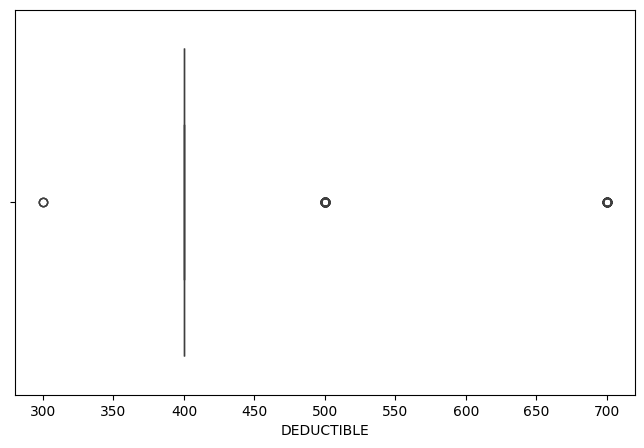

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=Df_fraudes_crudo['DEDUCTIBLE'])
plt.show()

Outliers no trascendentes. Se ignorara el calculo.

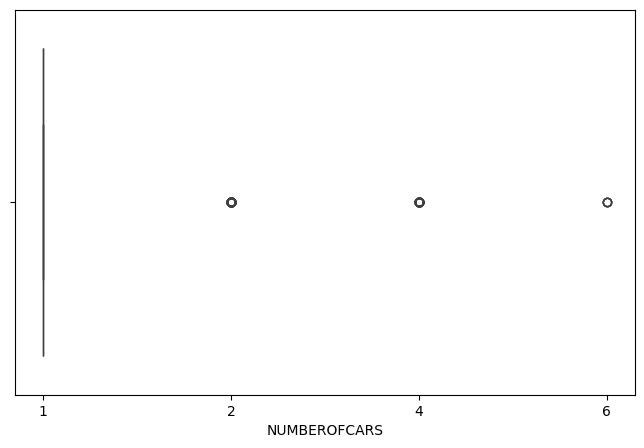

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=Df_fraudes_crudo['NUMBEROFCARS'])
plt.show()

A primera vista, este outlier si pareciera ser mas trascendente.

Calculo de outliers con desviacion estandar para la columnas NumberOfCars

In [20]:
Df_fraudes_crudo['NUMBEROFCARS'] = Df_fraudes_crudo['NUMBEROFCARS'].astype(int)
print(
    Df_fraudes_crudo['NUMBEROFCARS'].dtype
)

int64


In [21]:
media_cantidad_autos = Df_fraudes_crudo['NUMBEROFCARS'].mean()
desviacion_cantidad_autos = Df_fraudes_crudo['NUMBEROFCARS'].std()

In [22]:
limite_inf = media_cantidad_autos - 3 * desviacion_cantidad_autos
limite_sup = media_cantidad_autos + 3 * desviacion_cantidad_autos

In [23]:
import numpy as np

In [24]:
Df_fraudes_crudo['NUMBEROFCARS'] = np.where(Df_fraudes_crudo['NUMBEROFCARS'] > limite_sup, media_cantidad_autos, Df_fraudes_crudo['NUMBEROFCARS'])


In [25]:
Df_fraudes_crudo['NUMBEROFCARS']

0       1.0
1       1.0
2       2.0
3       1.0
4       1.0
       ... 
1777    1.0
1778    1.0
1779    1.0
1780    1.0
1781    1.0
Name: NUMBEROFCARS, Length: 1782, dtype: float64

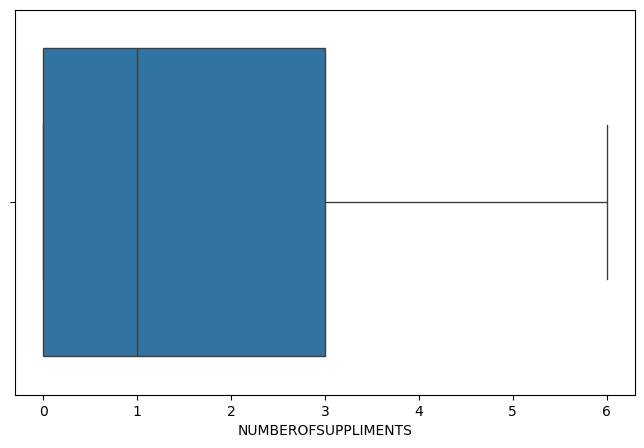

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=Df_fraudes_crudo['NUMBEROFSUPPLIMENTS'])
plt.show()

Se encontraron outliers que podrian afectar al analisis dentro de la columna NumberOfSupplimetns. Se procede a una nueva tecnica de deteccion para confirmar la trascendencia de los mismos.

In [27]:
suppliments_number_mean = Df_fraudes_crudo['NUMBEROFSUPPLIMENTS'].mean()
suppliments_number_std = Df_fraudes_crudo['NUMBEROFSUPPLIMENTS'].std()

In [28]:
limite_inf_sn = suppliments_number_mean - 3 * suppliments_number_std
limite_sup_sn = suppliments_number_mean + 3 * suppliments_number_std

No se encontraron anomalias ni datos nulos en el dataset. Por lo que esto concluye con la preparacion de los datos.

Se procede al analisis explotario inicial.

In [29]:
print(
    Df_fraudes_crudo.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WEEKOFMONTH          1782 non-null   int64  
 1   DAYOFWEEK            1782 non-null   object 
 2   MAKE                 1782 non-null   object 
 3   ACCIDENTAREA         1782 non-null   object 
 4   DAYOFWEEKCLAIMED     1782 non-null   object 
 5   MONTHCLAIMED         1782 non-null   object 
 6   WEEKOFMONTHCLAIMED   1782 non-null   int64  
 7   SEX                  1782 non-null   object 
 8   MARITALSTATUS        1782 non-null   object 
 9   FAULT                1782 non-null   object 
 10  VEHICLECATEGORY      1782 non-null   object 
 11  VEHICLEPRICE         1782 non-null   object 
 12  POLICYNUMBER         1782 non-null   int64  
 13  REPNUMBER            1782 non-null   int64  
 14  DEDUCTIBLE           1782 non-null   int64  
 15  DRIVERRATING         1782 non-null   i

In [30]:
print(
    Df_fraudes_crudo.describe(include=object)
)

       DAYOFWEEK     MAKE ACCIDENTAREA DAYOFWEEKCLAIMED MONTHCLAIMED   SEX  \
count       1782     1782         1782             1782         1782  1782   
unique         7       15            2                7           12     2   
top       Monday  Pontiac        Urban           Monday          Mar  Male   
freq         309      432         1565              415          182  1544   

       MARITALSTATUS         FAULT VEHICLECATEGORY VEHICLEPRICE  ...  \
count           1782          1782            1782         1782  ...   
unique             4             2               3            6  ...   
top          Married  PolicyHolder           Sedan   medium_low  ...   
freq            1255          1517            1315          839  ...   

       DAYSPOLICYCLAIM PASTNUMBEROFCLAIMS AGEOFVEHICLE AGEOFPOLICYHOLDER  \
count             1782               1782         1782              1782   
unique               3                  4            8                 9   
top         morethan

In [31]:
print(Df_fraudes_crudo['WEEKOFMONTH'].value_counts())

WEEKOFMONTH
3    433
2    423
1    376
4    372
5    178
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribucion de reclamos en semanas del mes')

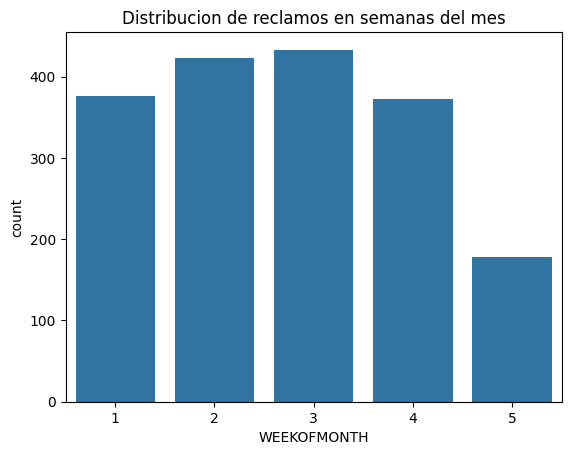

In [32]:
sns.countplot(x='WEEKOFMONTH', data=Df_fraudes_crudo)
plt.title('Distribucion de reclamos en semanas del mes')

In [33]:
print(Df_fraudes_crudo['DAYOFWEEK'].value_counts())

DAYOFWEEK
Monday       309
Friday       290
Tuesday      261
Thursday     250
Saturday     248
Wednesday    235
Sunday       189
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribucion de reclamos por dia de semana')

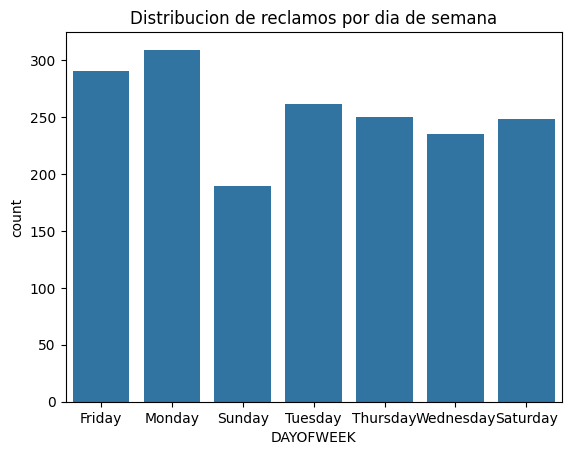

In [34]:
sns.countplot(x='DAYOFWEEK', data=Df_fraudes_crudo)
plt.title('Distribucion de reclamos por dia de semana')

Vemos una tendencia (no tan marcada) para reclamos los dias lunes entre la segunda y la tercera semana del mes.

In [35]:
print(Df_fraudes_crudo['MAKE'].value_counts())

MAKE
Pontiac      432
Toyota       360
Honda        329
Mazda        248
Chevrolet    196
Accura        81
Ford          60
VW            22
Saab          20
Mercury       11
Dodge          9
Saturn         9
Mecedes        2
Nisson         2
BMW            1
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribucion de reclamos por marca del auto')

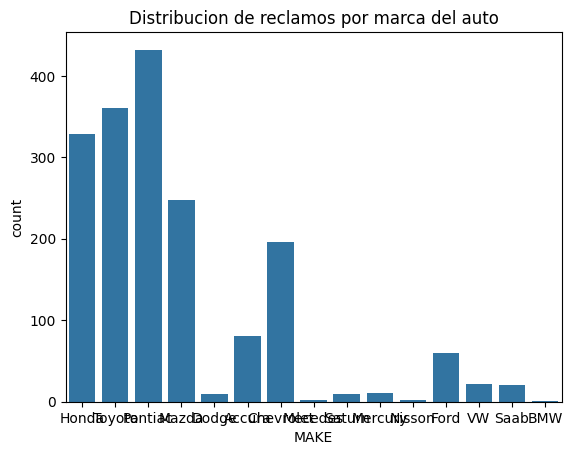

In [36]:
sns.countplot(x='MAKE', data=Df_fraudes_crudo)
plt.title('Distribucion de reclamos por marca del auto')

Vemos una clara tendencia de reclamos de usuarios de Pontiac, Toyota y Honda.

In [37]:
print(Df_fraudes_crudo['ACCIDENTAREA'].value_counts())

ACCIDENTAREA
Urban    1565
Rural     217
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribucion de reclamos por zona')

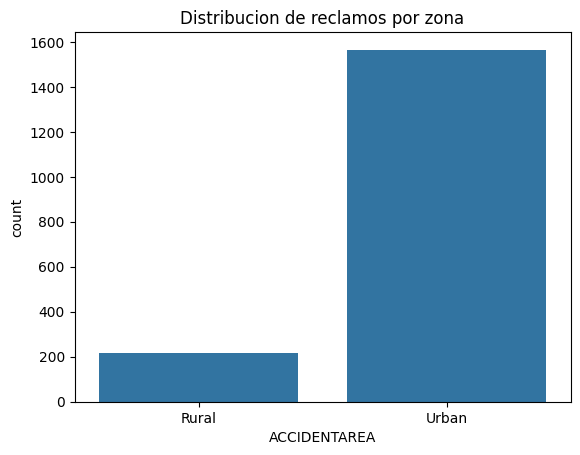

In [38]:
sns.countplot(x='ACCIDENTAREA', data=Df_fraudes_crudo)
plt.title('Distribucion de reclamos por zona')

Hay una marcada tendencia en reclamos realizados desde zonas urbanas.

In [39]:
print(Df_fraudes_crudo['SEX'].value_counts())

SEX
Male      1544
Female     238
Name: count, dtype: int64


Tambien una clara tendencia de reclamos por parte del genero masculino.

In [40]:
print(Df_fraudes_crudo['VEHICLEPRICE'].value_counts())

VEHICLEPRICE
medium_low     839
medium         402
very_high      309
low            168
medium_high     52
high            12
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribucion de reclamos por valor del auto')

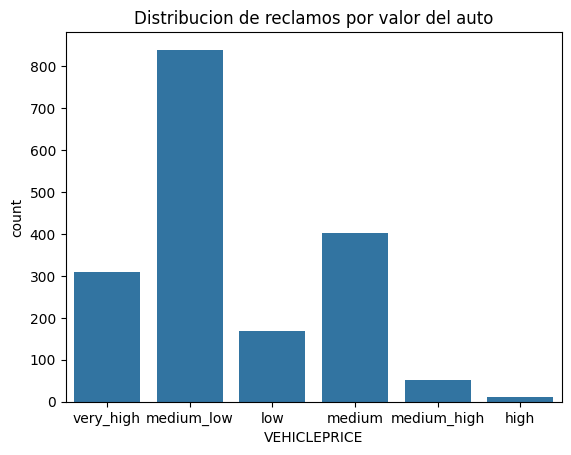

In [41]:
sns.countplot(x='VEHICLEPRICE', data=Df_fraudes_crudo)
plt.title('Distribucion de reclamos por valor del auto')

Marcada tendencia de reclamos por parte de vehiculos con valor medio bajo.

In [42]:
print(Df_fraudes_crudo['VEHICLECATEGORY'].value_counts())

VEHICLECATEGORY
Sedan      1315
Sport       402
Utility      65
Name: count, dtype: int64


Tendencia clara de reclamos por parte de autos 'sedan'.

In [43]:
print(Df_fraudes_crudo['DRIVERRATING'].value_counts())

DRIVERRATING
3    470
1    455
4    452
2    405
Name: count, dtype: int64


No hay una tendencia clara que indique que el Driver Rating influya.

In [44]:
print(Df_fraudes_crudo['PASTNUMBEROFCLAIMS'].value_counts())

PASTNUMBEROFCLAIMS
3    615
0    559
1    419
5    189
Name: count, dtype: int64


Hay una tendencia negativa en reclamos por parte de los policy holders con mas de 5 reclamos anteriores.

In [45]:
print(Df_fraudes_crudo['AGEOFPOLICYHOLDER'].value_counts())

AGEOFPOLICYHOLDER
35          667
40          479
mature      301
old         145
30           62
retired      59
minor        48
25           17
juvenile      4
Name: count, dtype: int64


Indica que la mayoria de los reclamos son realizados por personas entre 26 a 40 anios.

In [46]:
print(Df_fraudes_crudo['POLICEREPORTFILED'].value_counts())

POLICEREPORTFILED
No     1749
Yes      33
Name: count, dtype: int64


Clara tendencia a falta de peritaje policial.

In [47]:
print(Df_fraudes_crudo['WITNESSPRESENT'].value_counts())

WITNESSPRESENT
No     1776
Yes       6
Name: count, dtype: int64


Clara tendencia a la falta de testigos.

In [48]:
print(Df_fraudes_crudo['BASEPOLICY'].value_counts())

BASEPOLICY
Collision    763
AllPerils    681
Liability    338
Name: count, dtype: int64


In [49]:
print(Df_fraudes_crudo['NUMBEROFCARS'].value_counts())

NUMBEROFCARS
1.000000    1649
2.000000      78
1.140853      55
Name: count, dtype: int64


In [50]:
print(Df_fraudes_crudo['ADDRESSCHANGECLAIM'].value_counts())

ADDRESSCHANGECLAIM
0      1632
2        65
4        64
1        18
0.5       3
Name: count, dtype: int64


In [51]:
print(Df_fraudes_crudo['NUMBEROFSUPPLIMENTS'].value_counts())

NUMBEROFSUPPLIMENTS
0    851
6    438
1    288
3    205
Name: count, dtype: int64


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [53]:
Df_fraudes_crudo = Df_fraudes_crudo[['WEEKOFMONTH','DAYOFWEEK','DAYOFWEEKCLAIMED','DRIVERRATING','VEHICLEPRICE','WEEKOFMONTHCLAIMED','AGEOFPOLICYHOLDER','MONTHCLAIMED','MAKE','PASTNUMBEROFCLAIMS','FRAUDFOUND','BASEPOLICY','NUMBEROFCARS','AGEOFVEHICLE','FAULT']]

In [54]:
X = Df_fraudes_crudo.drop('FRAUDFOUND', axis=1)
y = Df_fraudes_crudo['FRAUDFOUND']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
categoricas_columnas = ['WEEKOFMONTH','DAYOFWEEK','DAYOFWEEKCLAIMED','MONTHCLAIMED','VEHICLEPRICE','AGEOFPOLICYHOLDER','DRIVERRATING','WEEKOFMONTHCLAIMED','MAKE','PASTNUMBEROFCLAIMS','BASEPOLICY','NUMBEROFCARS','AGEOFVEHICLE','FAULT']

In [58]:
X_train = pd.get_dummies(X_train, columns=categoricas_columnas, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categoricas_columnas, drop_first=True)

In [59]:
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [60]:
regresion_1 = LogisticRegression(solver='liblinear', random_state=42)

In [61]:
regresion_1.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [62]:
y_pred = regresion_1.predict(X_test)
print(y_pred[:10])

['Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes']


In [63]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5546
